# Prediction of flower species with Machine Learning

#### Importing all the required modules-

In [1]:
# import python tools
import sys

#for data analysis
import pandas as pd
import numpy as np

#for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline

#for machine learning
import scipy as sp
import sklearn as sk

#### Loading Data

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

#### Analysis by describing the Data

In [3]:
print(dataset.columns.values)

['sepal-length' 'sepal-width' 'petal-length' 'petal-width' 'class']


In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


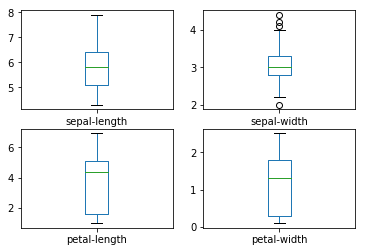

In [6]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

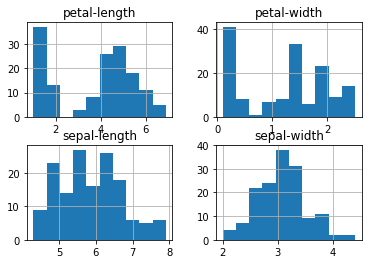

In [7]:
# histograms
dataset.hist()
plt.show()

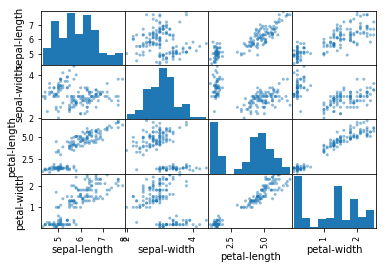

In [8]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

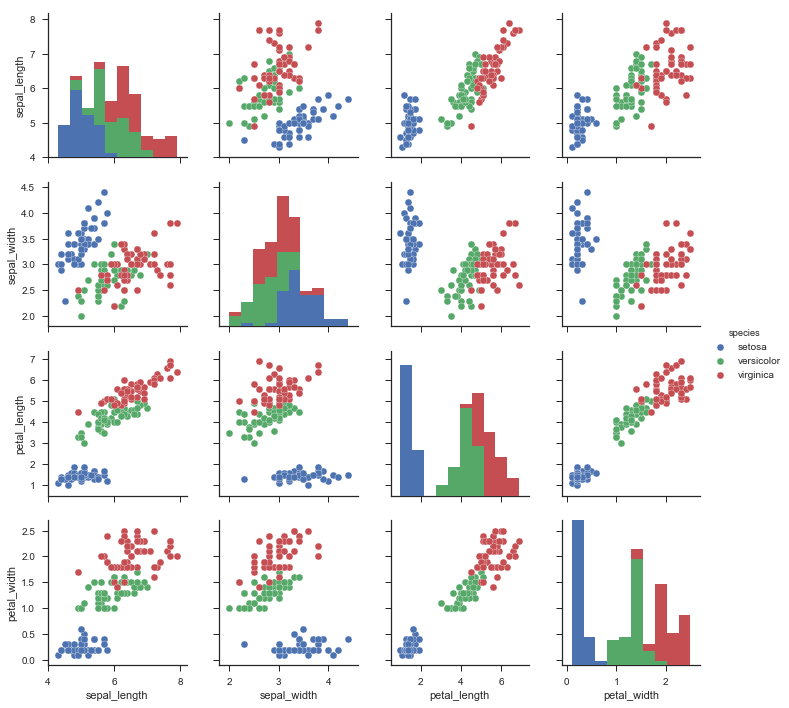

In [9]:
import seaborn as sns
sns.set(style="ticks")
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

#### spliting the data

In [10]:
from sklearn import model_selection
# Split-out validation dataset
array = dataset.values
X = array[:,0:4] # data, all 4 feature 
Y = array[:,4]   # last feature, which species # class
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

#### Model selection (selecting classification model)

In [11]:
from sklearn.svm import SVC
#svm
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred1 = svc.predict(X_validation)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2) #rounding- applying algorithm on each fold
acc_svc

99.17

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#k nearest
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred2 = knn.predict(X_validation)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

97.5

In [13]:
from sklearn.naive_bayes import GaussianNB
#GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred3 = gaussian.predict(X_validation)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

98.33

In [14]:
result = pd.DataFrame({
    'Model': ['SVC', 'KNeighborsClassifier', 
              'GaussianNB'],
    'Score': [acc_svc, acc_knn, 
              acc_gaussian]})

result.sort_values(by='Score', ascending=False)

,Model,Score
0,SVC,99.17
2,GaussianNB,98.33
1,KNeighborsClassifier,97.50


I am describing only KNN model. SVM model is taking only two features thats why it is not accurate, may be prediction of other species of flower depends on their all features. In GuassianNB model all features are unrelated to each other, but in our dataset some features are related to each other (refer-scatter_matrix). i am going to apply cross validationn method k-fold for making more perfact model....

#### Cross Validation (using k fold method)

Cross-validation can be used to estimate the test error associated with a learning method in order to evaluate its performance, or to select the appropriate level of flexibility.  for making more accurate and less error/ missclassification

In [15]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print(k_scores)

[0.9725757575757574, 0.9648834498834498, 0.9725757575757574, 0.9634848484848485, 0.9816666666666667, 0.9725757575757574, 0.9725757575757574, 0.9657925407925407, 0.9839743589743589, 0.9839743589743589, 0.9839743589743589, 0.9839743589743589, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 0.9825757575757574, 0.9825757575757574, 0.9742424242424242, 0.9916666666666666, 0.9665501165501166, 0.9756410256410255, 0.9748834498834498, 0.9839743589743589, 0.9748834498834498, 0.9839743589743589, 0.9748834498834498, 0.9748834498834498, 0.9748834498834498, 0.9839743589743589, 0.9748834498834498]


In [16]:
# in essence, this is basically running the k-fold cross-validation method 30 times because we want to run through K values from 1 to 30
# we should have 30 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.9916666666666666


Text(0,0.5,'Cross-validated accuracy')

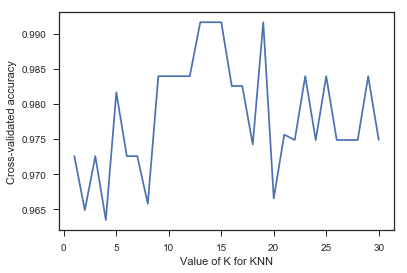

In [17]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

we will choose k=14 as our best KNN model

#### Prediction with KNN Model

In [18]:
from sklearn.neighbors import KNeighborsClassifier
#k nearest
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train, Y_train)
Y_pred2 = knn.predict(X_validation)

#### Evolution with KNN Model

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



# Evolution of result with KNN model
print(accuracy_score(Y_validation, Y_pred2) * 100)  # same arguments
print(confusion_matrix(Y_validation, Y_pred2))
print(classification_report(Y_validation, Y_pred2))

93.33333333333333
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.91      0.91      0.91        11

    avg / total       0.93      0.93      0.93        30



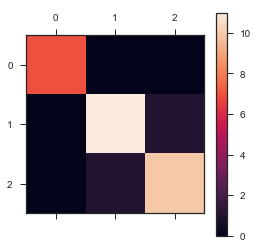

In [20]:
plt.matshow(confusion_matrix(Y_validation, Y_pred2))
plt.colorbar()